In [1]:
import torch
import matplotlib.pyplot as plt

# 构造数据

`torch.normal(means, std, out=None)`

- 返回一个张量，包含从给定参数means,std的离散正态分布中抽取随机数。
- 均值means是一个张量，包含每个输出元素相关的正态分布的均值。
- std是一个张量，包含每个输出元素相关的正态分布的标准差。
- 均值和标准差的形状不须匹配，但每个张量的元素个数须相同。

In [2]:
n_data = torch.ones(100, 2) # shape为(100, 2)的全1张量
x0 = torch.normal(2*n_data, 1) 
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

In [3]:
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1)).type(torch.LongTensor)

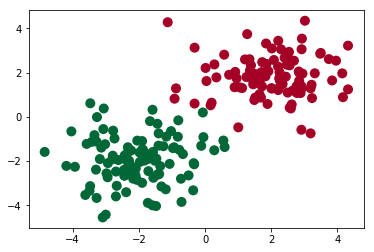

In [4]:
# 画图
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

# 建立神经网络

In [5]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.out(x)
        return x

In [6]:
net = Net(n_feature=2, n_hidden=10, n_output=2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


# 训练网络

In [7]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
# 注意，算误差的时候：
# 真实值不是 one-hot 形式的, 而是 1D Tensor, (batch,)
# 预测值是 2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()

for _ in range(100): 
    out = net(x)    # 喂给 net 训练数据 x，输出 2D tensor (batch, n_classes)
    
    loss = loss_func(out, y) # 计算两者的误差
    
    optimizer.zero_grad() # 清空上一步的梯度
    
    loss.backward()    # 误差反向传播，计算梯度
    
    optimizer.step()   # 计算新的参数

# 可视化训练过程

`torch.max()`
- torch.max()\[0\]：返回最大值本身
- troch.max()\[1\]：返回最大值所在的位置索引
- torch.max(tensor1,tensor2)：element-wise 比较 tensor1 和 tensor2 中的元素，返回较大的那个值

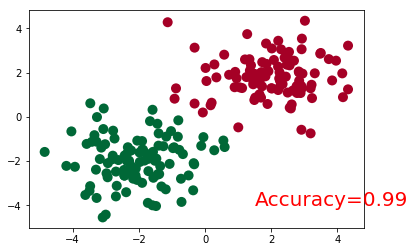

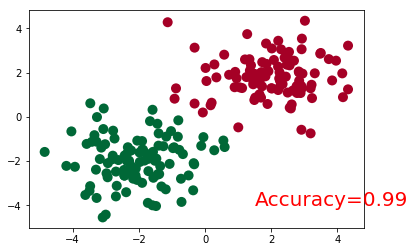

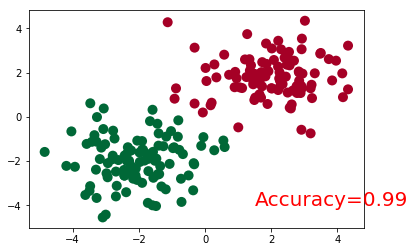

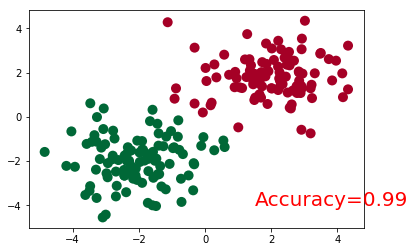

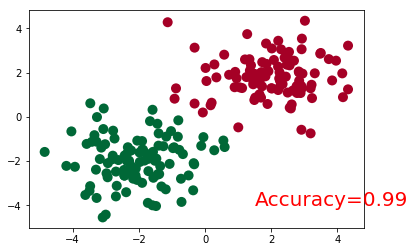

In [8]:
plt.ion()   # 画图
plt.show()

for t in range(100): 
    out = net(x)    # 喂给 net 训练数据 x，输出 2D tensor (batch, n_classes)
    
    loss = loss_func(out, y) # 计算两者的误差
    
    optimizer.zero_grad() # 清空上一步的梯度
    
    loss.backward()    # 误差反向传播，计算梯度
    
    optimizer.step()   # 计算新的参数
    
    if t % 20 == 0:
        plt.cla()
        prediction = torch.max(torch.softmax(out, 1), 1)[1]
        pred_y = prediction.data.numpy().squeeze() # 用于降维
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()        